# Analisando dados de clientes

In [1]:
import pandas as pd # para importar os csv's como um DataFrame e poder manipulá-los
import seaborn as srn # para realização de alguns gráficos
import matplotlib.pyplot as plt # para realização de alguns gráficos

### Etapa 1: Importar os dados, visualizar e checar se há algum problema com eles

In [2]:
df_clientes = pd.read_csv("base_clientes (1) (1).csv", sep = "\t")
df_redesocial = pd.read_csv("base_redesocial (1).csv")
df_transacoes = pd.read_csv("base_transacoes (1) (1).csv", sep = ";")

* Quantas linhas e colunas há em cada DataFrame?

In [3]:
df_clientes.shape

(661, 7)

In [4]:
df_redesocial.shape

(2454, 3)

In [5]:
df_transacoes.shape

(5231, 7)

* Visualizando as 5 primeiras linhas de cada df

In [6]:
df_clientes.head()

,cpf,nome,sexo,idade,renda,estado,email
0,755077935,WELINTOM,masculino,30,14915,RS,welintom3@hotmail.com
1,338048902,CLEIDIOMAR,masculino,28,18322,SP,cleidiomar5@hotmail.com
2,7471498,AMANDIO,masculino,43,10177,TO,amandio8@hotmail.com
3,777780623,DECIVALDO,masculino,38,35864,RJ,decivaldo5@hotmail.com
4,574079717,GERALD,masculino,46,35234,MG,gerald5@hotmail.com


In [7]:
df_redesocial.head()

,email,pagina,rede_social
0,carmina8@hotmail.com,Kopenhagen,instagram
1,rute5@hotmail.com,Kopenhagen,facebook
2,liberaci5@hotmail.com,Kopenhagen,facebook
3,natlia3@hotmail.com,Uber,instagram
4,francileni4@hotmail.com,Uber,facebook


In [8]:
df_transacoes.head()

,id_tran,cpf,estabelecimento,valor,status,data,Unnamed: 6
0,4137,902446808,cacau show,71,aprovada,Feb-20,NaN
1,244,264999401,cacau show,488,aprovada,Apr-20,NaN
2,1815,59310922,cacau show,427,aprovada,May-20,NaN
3,2142,178025312,cacau show,151,aprovada,Apr-20,NaN
4,555,693023755,cacau show,670,aprovada,Mar-20,NaN


* Verificando se há valores NaN

In [9]:
df_clientes.isnull().sum()

cpf       0
nome      0
sexo      0
idade     0
renda     0
estado    0
email     0
dtype: int64

In [10]:
df_redesocial.isnull().sum()

email          0
pagina         0
rede_social    0
dtype: int64

In [11]:
df_transacoes.isnull().sum()

id_tran               0
cpf                   0
estabelecimento       0
valor                 0
status                0
data                  0
Unnamed: 6         5231
dtype: int64

Observação: essa ultima coluna "Unnamed:6" contém 5231 NaN's (todas as linhas do df) pois depois das datas ainda há separadores ";", então é criada mais uma coluna no DataFrame. O número 6 indica o índice da coluna criada.
Como ela não é significativa podemos tirá-la.

In [12]:
df_transacoes.drop('Unnamed: 6', axis = 1, inplace = True) # axis = 1 pois 0 é linha e 1 é coluna
df_transacoes.head()

,id_tran,cpf,estabelecimento,valor,status,data
0,4137,902446808,cacau show,71,aprovada,Feb-20
1,244,264999401,cacau show,488,aprovada,Apr-20
2,1815,59310922,cacau show,427,aprovada,May-20
3,2142,178025312,cacau show,151,aprovada,Apr-20
4,555,693023755,cacau show,670,aprovada,Mar-20


* Verificando se há valores duplicados

In [13]:
# Buscamos os dados duplicados no df dos clientes pelo cpf, pois dois clientes não podem ter o mesmo cpf
df_clientes[df_clientes.duplicated(['cpf'], keep = False)] 

,cpf,nome,sexo,idade,renda,estado,email
35,686809896,MATUS,masculino,52,31415,SP,matus5@hotmail.com
36,969685417,IRISNALDO,masculino,27,19403,RS,irisnaldo9@hotmail.com
37,241628473,AIR,masculino,30,16368,PR,air3@hotmail.com
38,547507596,CASSIANE,feminino,36,29545,TO,cassiane3@hotmail.com
39,637992749,CELIS,feminino,51,19318,SP,celis5@hotmail.com
...,...,...,...,...,...,...,...
656,191349067,RAIMUDA,feminino,42,24014,RJ,raimuda4@hotmail.com
657,855387121,JACI,feminino,21,24211,RJ,jaci0@hotmail.com
658,763141734,QUINTINO,masculino,20,24139,TO,quintino3@hotmail.com
659,235053593,ANJO,masculino,47,37542,MG,anjo0@hotmail.com


In [14]:
# Buscamos pelo email no df_redesocial
df_redesocial[df_redesocial.duplicated(['email'], keep = False)] 

,email,pagina,rede_social
0,carmina8@hotmail.com,Kopenhagen,instagram
1,rute5@hotmail.com,Kopenhagen,facebook
2,liberaci5@hotmail.com,Kopenhagen,facebook
3,natlia3@hotmail.com,Uber,instagram
4,francileni4@hotmail.com,Uber,facebook
...,...,...,...
2449,magdiel1@hotmail.com,Netflix,instagram
2450,oldair6@hotmail.com,Netflix,facebook
2451,lincoln8@hotmail.com,Itaú,facebook
2452,cristian3@hotmail.com,Apple,instagram


In [15]:
# Buscamos pelo id da transação no df_transacoes
df_transacoes[df_transacoes.duplicated(['id_tran'], keep=False)] 
# Não há duplicados, nada precisa ser feito

,id_tran,cpf,estabelecimento,valor,status,data


In [16]:
# No df_clientes, pegamos um cliente teoricamente duplicado para ver se é isso mesmo
df_clientes.loc[df_clientes['nome'] ==  'MATUS']

,cpf,nome,sexo,idade,renda,estado,email
35,686809896,MATUS,masculino,52,31415,SP,matus5@hotmail.com
621,686809896,MATUS,masculino,52,31415,SP,matus5@hotmail.com


In [17]:
# Pegando um email duplicado no df das redes sociais
df_redesocial.loc[df_redesocial['email'] ==  'rute5@hotmail.com']
# Não precisamos eliminar nenhuma linha pois elas não necessarimente são iguais

,email,pagina,rede_social
1,rute5@hotmail.com,Kopenhagen,facebook
622,rute5@hotmail.com,Apple,instagram
1243,rute5@hotmail.com,Cacau Show,instagram


In [18]:
# No df_clientes, apaga os dados duplicados e fica só com o primeiro que aparece
df_clientes.drop_duplicates(subset = "cpf", keep = 'first', inplace = True)

In [19]:
# Buscamos duplicados novamente e verificamos se eles realmente sumiram
df_clientes[df_clientes.duplicated(['cpf'], keep=False)] 

,cpf,nome,sexo,idade,renda,estado,email


* Agrupando para ver as ocorrências de cada valor em algumas colunas.

In [20]:
sexo_clientes = df_clientes.groupby(['sexo']).size()
sexo_clientes

sexo
feminino     276
masculino    345
dtype: int64

<AxesSubplot:xlabel='sexo'>

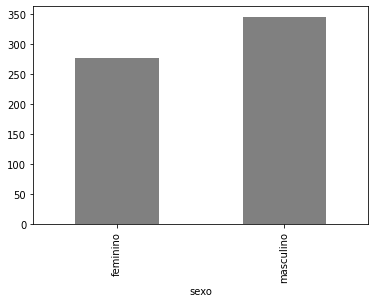

In [21]:
sexo_clientes.plot.bar(color = 'gray') # faz um gráfico dos valores da coluna

In [22]:
df_clientes['idade'].describe() # mostra informações de colunas numéricas, com a média, mediana, desvio padrão, etc.
# média e mediana próximas (mean e 25%), indicio de dados regulares, sem grandes outliers
# valores minímos e máximo condizentes com a realidade, 18 e 60

count    621.000000
mean      38.745572
std       12.131657
min       18.000000
25%       28.000000
50%       39.000000
75%       49.000000
max       60.000000
Name: idade, dtype: float64

Text(0.5, 1.0, 'Idade')

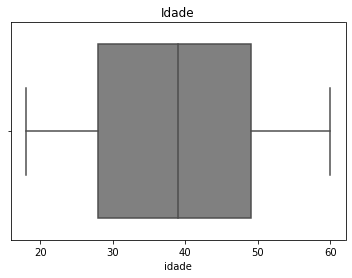

In [23]:
# visualizar dados numéricos em um boxplot
srn.boxplot(x = df_clientes['idade'], color = "gray").set_title(label = 'Idade')

Text(0.5, 1.0, 'Idade')

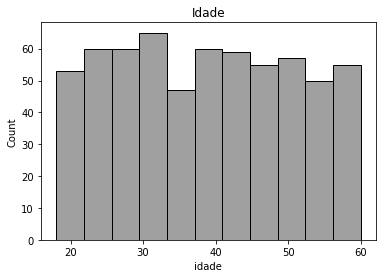

In [24]:
# visualizar em um gráfico de barras
srn.histplot(df_clientes['idade'], color = "grey").set_title('Idade')

In [25]:
aprov_compras = df_transacoes.groupby(['status']).size()
aprov_compras

status
aprovada    5079
negada       152
dtype: int64

In [26]:
estabelecimento_compra = df_transacoes.groupby(['estabelecimento']).size()
estabelecimento_compra

estabelecimento
CARREFOUR          287
IFOOD              337
NETFLIX            324
RENNER            1014
UBER               314
Uber               324
ZARA IBIRAP        353
cacau show         344
ifood              300
smart fit          343
uber               329
zara analia fr     306
zara morumbi       339
zara plazasul      317
dtype: int64

In [27]:
paginas_redesocial = df_redesocial.groupby(['pagina']).size()
paginas_redesocial

pagina
Apple         260
Cacau Show    279
Itaú          341
Kopenhagen    237
Netflix       284
Nike          246
Renner        128
Smart Fit      62
Uber          326
Zara          291
dtype: int64

### Etapa 2: Respondendo as perguntas propostas

##### 1.    Quantos clientes temos?

Como foram eliminados clientes "duplicados" no df_clientes, ou seja, linhas que tinham o mesmo cliente, localizados através do cpf, conclui-se que o número de linhas do DataFrame é o número de clientes únicos.

In [28]:
df_clientes.shape

(621, 7)

Portanto, a empresa de serviços financeiros tem 621 clientes.

##### 2.    Quantas compras foram efetivamente feitas no mês de maio?

In [29]:
df_transacoes.loc[(df_transacoes.status == 'aprovada') & (df_transacoes.data.str.contains('May', regex = False))]

,id_tran,cpf,estabelecimento,valor,status,data
2,1815,59310922,cacau show,427,aprovada,May-20
5,4091,589663115,cacau show,304,aprovada,May-20
6,1658,145484666,cacau show,8,aprovada,May-20
25,4880,893644632,cacau show,545,aprovada,May-20
28,1935,244395333,cacau show,609,aprovada,May-20
...,...,...,...,...,...,...
5196,3181,47928889,zara plazasul,669,aprovada,May-20
5197,4419,68303890,zara plazasul,503,aprovada,May-20
5205,2760,426470187,zara plazasul,739,aprovada,May-20
5212,158,830783739,zara plazasul,293,aprovada,May-20


Foram efetivadas 985 compras no mês de maio.

##### 3.    Mostre em um gráfico/tabela a quantidade de compras aprovadas e o valor gasto no Uber de janeiro a maio (mês a mês).

In [30]:
df_uber_aprovadas = df_transacoes.loc[(df_transacoes.status == 'aprovada') & (df_transacoes.estabelecimento == 'Uber')]
df_uber_aprovadas

,id_tran,cpf,estabelecimento,valor,status,data
2949,4504,179426370,Uber,71,aprovada,Apr-20
2950,3595,398622833,Uber,39,aprovada,Apr-20
2959,1069,192319728,Uber,86,aprovada,Mar-20
2961,3319,655497369,Uber,31,aprovada,Feb-20
2964,138,352769712,Uber,96,aprovada,Jan-20
...,...,...,...,...,...,...
3901,2100,539464180,Uber,56,aprovada,Mar-20
3903,3138,117958664,Uber,64,aprovada,Mar-20
3907,799,326207860,Uber,51,aprovada,Jan-20
3908,3145,41358977,Uber,92,aprovada,Jan-20


In [31]:
meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May']
uber_meses, numero_aprovadas, valor_meses = [], [], []

for i in range (len(meses)):
    # append na lista que armazena os dataframes das compras do Uber de cada mês
    uber_meses.append(df_uber_aprovadas.loc[(df_uber_aprovadas.data.str.contains(meses[i], regex = False))])
    # append na lista que armazena o numero de compras aprovadas em cada mês
    numero_aprovadas.append(uber_meses[i].shape[0])
    # append na lista que armazena o valor total das compras aprovadas no Uber de cada mês 
    valor_meses.append(uber_meses[i]['valor'].sum())

print(numero_aprovadas[0], numero_aprovadas[1], numero_aprovadas[2], numero_aprovadas[3], numero_aprovadas[4])
print(valor_meses[0], valor_meses[1], valor_meses[2], valor_meses[3], valor_meses[4])

69 68 66 46 68
3582 3590 3721 2669 3415


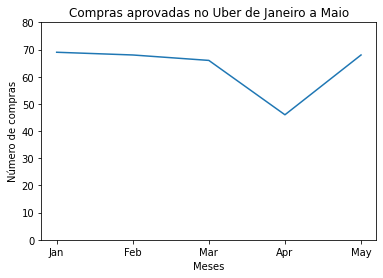

In [32]:
plt.ylim(0, 80)
plt.plot(meses, numero_aprovadas)
plt.title('Compras aprovadas no Uber de Janeiro a Maio')
plt.xlabel('Meses')
plt.ylabel('Número de compras')
plt.show()

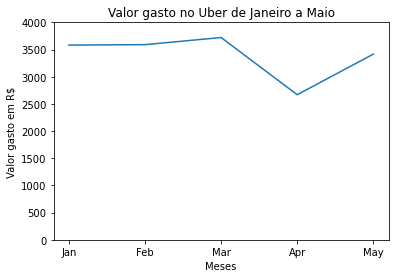

In [33]:
plt.ylim(0, 4000)
plt.plot(meses, valor_meses)
plt.title('Valor gasto no Uber de Janeiro a Maio')
plt.xlabel('Meses')
plt.ylabel('Valor gasto em R$')
plt.show()

##### 4.    Como analisar se o aumento/diminuição no último mês foi significativo?

Podemos ver que houve uma queda significativa de 20 compras aprovadas no Uber de Março para Abril, o que ocasionou uma perda de 1052 reais. De Abril para Maio o número de compras aumentou em 22 e o valor gastou aumentou 746 reais. Portanto, podemos considerar que houve um aumento significativo em relação a Abril mas não necessariamente em relação aos meses passados. 

##### 5.    Qual foi o valor total gasto e a quantidade de compras feitas na Zara por mulheres?

In [34]:
df_zara = df_transacoes.loc[(df_transacoes.status == 'aprovada') & (df_transacoes.estabelecimento.str.contains('zara', regex = False))]
df_zara

,id_tran,cpf,estabelecimento,valor,status,data
3916,4877,137847973,zara analia fr,714,aprovada,May-20
3917,317,874995628,zara analia fr,372,aprovada,Mar-20
3918,255,144056529,zara analia fr,447,aprovada,May-20
3919,3209,672912917,zara analia fr,776,aprovada,Apr-20
3920,1851,198895053,zara analia fr,451,aprovada,May-20
...,...,...,...,...,...,...
5226,2837,976981026,zara plazasul,226,aprovada,Feb-20
5227,3190,260846826,zara plazasul,246,aprovada,Apr-20
5228,1447,763141734,zara plazasul,746,aprovada,Jan-20
5229,360,667968646,zara plazasul,202,aprovada,Mar-20


In [35]:
cpfs_zara = list(df_zara['cpf'])
len(cpfs_zara)

934

In [36]:
clientes_femininos = df_clientes.loc[(df_clientes.sexo == 'feminino')]
clientes_femininos

,cpf,nome,sexo,idade,renda,estado,email
7,132466721,WANESSA,feminino,19,22098,PR,wanessa0@hotmail.com
8,753246858,MICAEL,feminino,48,33742,SP,micael2@hotmail.com
10,313018047,CELEIDA,feminino,58,10782,TO,celeida7@hotmail.com
16,953989648,JENEFE,feminino,26,14362,MG,jenefe6@hotmail.com
17,549496525,ALLANE,feminino,34,24514,RJ,allane6@hotmail.com
...,...,...,...,...,...,...,...
607,34879512,EUNICI,feminino,25,22404,TO,eunici2@hotmail.com
609,54161125,CAMYLLE,feminino,42,36811,MS,camylle2@hotmail.com
610,3947638,KACIANE,feminino,38,33507,TO,kaciane4@hotmail.com
614,388249629,ISALRA,feminino,30,28386,SP,isalra7@hotmail.com


In [37]:
cpfs_femininos = list(clientes_femininos['cpf'])
len(cpfs_femininos)

276

In [38]:
cpfs_zara_femininos = []

for i in range (len(cpfs_zara)):
    if cpfs_zara[i] in cpfs_femininos:
        cpfs_zara_femininos.append(cpfs_zara[i])

print(len(cpfs_zara_femininos))

419


In [39]:
df_zara_feminino = df_zara[df_zara.cpf.isin(cpfs_zara_femininos)]
df_zara_feminino

,id_tran,cpf,estabelecimento,valor,status,data
3916,4877,137847973,zara analia fr,714,aprovada,May-20
3921,2144,650770868,zara analia fr,297,aprovada,Jan-20
3926,2631,178959876,zara analia fr,53,aprovada,Jan-20
3928,4007,426470187,zara analia fr,792,aprovada,Feb-20
3933,760,798466063,zara analia fr,423,aprovada,May-20
...,...,...,...,...,...,...
5219,1391,767585643,zara plazasul,293,aprovada,Jan-20
5222,3515,68159565,zara plazasul,631,aprovada,Apr-20
5223,3211,650770868,zara plazasul,310,aprovada,May-20
5226,2837,976981026,zara plazasul,226,aprovada,Feb-20


In [40]:
df_zara_feminino['valor'].sum()

210124

Assim, fica claro que foram feitas 419 compras por mulheres na Zara, totalizando 210124 reais.

##### 6.    Qual o perfil das pessoas que mais curtem a página do Itaú? Sexo, idade, renda, estado... 

In [41]:
df_redesocial_itau = df_redesocial.loc[(df_redesocial.pagina == 'Itaú')]
df_redesocial_itau

,email,pagina,rede_social
5,henrique5@hotmail.com,Itaú,facebook
7,alcione4@hotmail.com,Itaú,instagram
18,adenilsa9@hotmail.com,Itaú,facebook
19,natividade8@hotmail.com,Itaú,instagram
27,jacineide7@hotmail.com,Itaú,instagram
...,...,...,...
2418,jorge6@hotmail.com,Itaú,facebook
2422,fabriciano1@hotmail.com,Itaú,facebook
2437,jhony6@hotmail.com,Itaú,instagram
2446,walyson6@hotmail.com,Itaú,instagram


In [42]:
emails_itau = list(df_redesocial_itau['email'])
len(emails_itau)

341

In [43]:
df_perfil_itau = df_clientes[df_clientes.email.isin(emails_itau)]
df_perfil_itau

,cpf,nome,sexo,idade,renda,estado,email
0,755077935,WELINTOM,masculino,30,14915,RS,welintom3@hotmail.com
1,338048902,CLEIDIOMAR,masculino,28,18322,SP,cleidiomar5@hotmail.com
4,574079717,GERALD,masculino,46,35234,MG,gerald5@hotmail.com
5,40703137,LINCOLN,masculino,53,34094,MG,lincoln8@hotmail.com
7,132466721,WANESSA,feminino,19,22098,PR,wanessa0@hotmail.com
...,...,...,...,...,...,...,...
613,109123843,GUIHERME,masculino,60,17588,SP,guiherme6@hotmail.com
615,317703130,DIOCLESIO,masculino,53,16285,RS,dioclesio2@hotmail.com
616,995998609,VANILDES,feminino,25,30025,MG,vanildes6@hotmail.com
617,59310922,LEDILSON,masculino,50,18653,SP,ledilson4@hotmail.com


In [44]:
sexo_itau = df_perfil_itau.groupby(['sexo']).size()
sexo_itau

sexo
feminino     144
masculino    122
dtype: int64

<AxesSubplot:xlabel='sexo'>

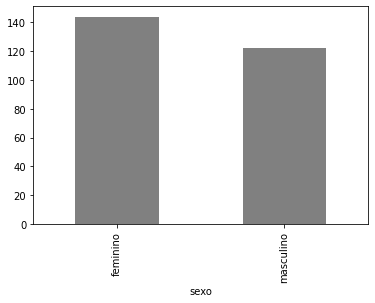

In [45]:
sexo_itau.plot.bar(color = 'gray')

In [46]:
df_perfil_itau['idade'].describe()

count    266.000000
mean      38.981203
std       12.508549
min       18.000000
25%       28.000000
50%       39.000000
75%       50.000000
max       60.000000
Name: idade, dtype: float64

Text(0.5, 1.0, 'Idade')

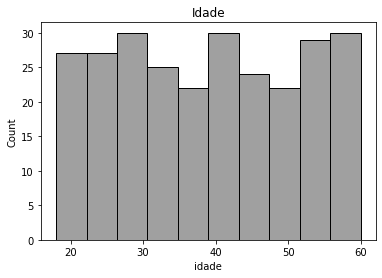

In [47]:
srn.histplot(df_perfil_itau['idade'], color = "grey").set_title('Idade')

In [48]:
df_perfil_itau['renda'].describe()

count      266.000000
mean     25221.018797
std       8416.884225
min      10133.000000
25%      18366.750000
50%      25737.000000
75%      32131.750000
max      39961.000000
Name: renda, dtype: float64

Text(0.5, 1.0, 'Renda')

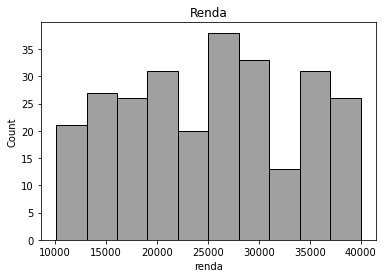

In [49]:
srn.histplot(df_perfil_itau['renda'], color = "grey").set_title('Renda')

In [50]:
estados_itau = df_perfil_itau.groupby(['estado']).size()
estados_itau

estado
MG    47
MS    27
PR    26
RJ    51
RS    23
SP    66
TO    26
dtype: int64

<AxesSubplot:xlabel='estado'>

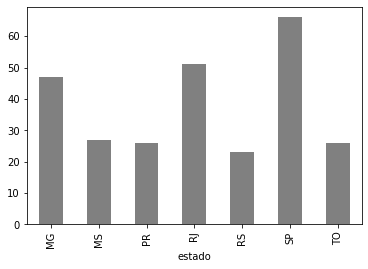

In [51]:
estados_itau.plot.bar(color = 'gray')

O perfil das pessoas que mais curtem a página do Itaú são mulheres, pessoas de idade média aproximada de 39 anos, renda média 25221, e a maioria do estado de SP.